# dataAccess
This notebook demonstrates a basic example of OOI data acquision using the python package [**yodapy**](https://github.com/cormorack/yodapy) specifically structured for individuals involved in the OOI ECS Evaluation Article project. **Part 1** of this notebook walks through exploring what instruments and data are available at the OOI Coastal Enduance Oregon Line. In **Part 2** we request the data from a specific instrument that we chose in Part 1. **Part 3** demonstrates a few quick ways of exploring the dataset using the built in plotting functions of the xarray dataset.  You can jump in to Part 2 directly if you already have an idea of the instrument you are looking for.

This notebook was designed to be "clone and play", and is set up to run:
- A local python installation
- An instance of the [escience-pangeo deployment](https://nasa.pangeo.io)
- An instance of [Google Colaboratory](https://colab.research.google.com/)

This notebook assumes most standard python science and data libraries are already part of your environment, and simply installs `yodapy` under the assumption that you will be spinning up a clean instance each time.  If you will be using this locally, you can comment out the `!pip install yodapy` command in the import block below and instead install it via command line prior to using this notebook.  If you plan to look at a long time series, many of the datasets you may be requesting can be quite large (2-5 Gb), so keep that in mind when choosing where to run/host your analysis.

### Part 1: Identifying Available OOI Data

Let's import `yodapy` and get things going:

In [ ]:
!pip install yodapy # If using your local machine, comment out this line but be sure to have already installed it to your computer before launching the notebook 
from yodapy.datasources import OOI
from yodapy.utils.creds import set_credentials_file
%matplotlib inline # this is a jupyter command just telling the notebook to show me all of the plots I make inline as call a plot function

You will need to set your own OOI credentials in order to access/request data.  If you are working locally and have installed `yodapy` on your own machine, you will only every have to execute cell below *once*.  After that, clear your username and token and comment out the line so that you don't accidently share this information.

If you do not know or have credentials, you can register/find them at the [OOI Data Portal](https://ooinet.oceanobservatories.org/). For most institutions, select the **Log In** dropdown at the top right corner fo the webpage, and click **Log In**.  Select **CILogin**, which will forward you to a new website where you can select your institution and use your credentials.  Once you are returned to the Data Portal, you should now see your email at the top right of the page.  Click on your email and select **User Profile**, where you will find your API credentials which includes both your username (format OOIAPI-XXXXXXXXXXXXXX) and your token (format XXXXXXXXXXX). Copy that information into the cell below:

In [4]:
set_credentials_file(data_source='ooi', username='', token='')

Now thanks to yodapy, we can initialize an OOI access object:

In [ ]:
ooi = OOI()

In [74]:
?ooi.search

Signature:
ooi.search(
    region=None,
    site=None,
    node=None,
    instrument=None,
    stream_type='Science',
    stream_method=None,
    stream=None,
    parameter=None,
)
Docstring:
Perform a search, and filters data catalog

Args:
    region (str): Region name. If multiple use comma separated.
    site (str): Site name. If multiple use comma separated.
    node (str): Node name. If multiple use comma separated.
    instrument (str): Instrument name. If multiple use comma separated.
    stream_type (str): Stream type. Either 'Science' or 'Engineering'. If multiple use comma separated.
    stream_method (str): Stream method. If multiple use comma separated.
    stream (str): Stream name. If multiple use comma separated.
    parameter (str): Parameter name. If multiple use comma separated.

Returns:
    self: Modified OOI Object
File:      /srv/conda/envs/notebook/lib/python3.6/site-packages/yodapy/datasources/ooi/OOI.py
Type:      method


This ooi object lets us search for data at a series of levels in the OOI system, from just selecting a region of the network to being as specific as a data parameter we are looking for.  For more information, you can run `?ooi.seach` to see the help information for the function. An example of all the levels of filter you can specify (based on the Coastal Endurance - Oregon Inshore Surface Mooring - Surface Buoy - CTD CE01ISSM-SBD17-06-CTDBPC000) are:

| filter          | description             | example                               |
|-----------------|-------------------------|---------------------------------------|
| `region`        | OOI region name         | `region='Coastal Endurance'`          |
| `site`          | OOI site name           | `site='Oregon Shelf Surface Mooring'` |
| `node`          | Instrument package      | `node='Surface Buoy'`                 |
| `instrument`    | Instrument name         | `instrument='CTD'`                    |
| `stream_type`   | Type of data stream     | `stream_type='Science'`               |
| `stream_method` | How data was delivered  | `stream_method='telemetered'`         |
| `stream`        | Specific name of stream | `stream='ctdbp_cdef_dcl_instrument'`  |
| `parameter`     | Specific data parameter | `parameter='Seawater Conductivity'`   |

For more information and examples of how OOI designates each of these, you can look at the [OOI Data Acces Portal](https://ooinet.oceanobservatories.org/).  For the purpose of this notebook, I'm going to jump right in to the data available at the Coastal Endurance Oregon Shelf Line which has cabled instruments at both the Shelf and Offshore sites.

<img src="Images/OOIOregonLine.png" alt="Drawing" style="width: 500px;"/>

Since this line is actually composed of several "sites", I'm going to run a search for everything at Coastal Endurance and then print out a list of sites that are included on the Oregon Line (note: glider data is always in its own site referred to as *Mobile Assets*).

In [75]:
ooi.search(region='Coastal Endurance')
print('Name of OOI Oregon Sites: ',[s for s in ooi.instruments['site_name'].unique() if 'Oregon' in s])

Name of OOI Oregon Sites:  ['Oregon Inshore Surface Mooring', 'Oregon Inshore Surface Piercing Profiler Mooring', 'Oregon Offshore Cabled Benthic Experiment Package', 'Oregon Offshore Cabled Deep Profiler Mooring', 'Oregon Offshore Cabled Shallow Profiler Mooring', 'Oregon Offshore Surface Mooring', 'Oregon Shelf Cabled Benthic Experiment Package', 'Oregon Shelf Surface Mooring', 'Oregon Shelf Surface Piercing Profiler Mooring']


Now that we have the names of the sites available, we can dig deeper and see what instruments are available by specifying `site` in the search function.  I'm going to take a look at the instruments from the cabled benthic experimental package at the 80m site:

In [76]:
ooi.search(region='Coastal Endurance', site='Oregon Shelf Cabled Benthic Experiment Package').instruments

,array_name,site_name,infrastructure_name,instrument_name,stream_method,stream_rd
0,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Low-Power JBox (LJ01D),3-D Single Point Velocity Meter,streamed,vel3d_cd_velocity_data
1,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Low-Power JBox (LJ01D),3-D Single Point Velocity Meter,bad_streamed,vel3d_cd_velocity_data
2,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Low-Power JBox (LJ01D),CTD,streamed,ctdbp_no_sample
3,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Low-Power JBox (LJ01D),Dissolved Oxygen,streamed,do_stable_sample
4,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Low-Power JBox (LJ01D),Seawater pH,streamed,phsen_data_record
5,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Low-Power JBox (LJ01D),Spectrophotometer,streamed,optaa_sample
6,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Low-Power JBox (LJ01D),Velocity Profiler (300kHz),streamed,adcp_pd0_beam_parsed
7,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Low-Power JBox (LJ01D),Velocity Profiler (300kHz),streamed,adcp_velocity_beam
8,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Low-Power JBox (LJ01D),pCO2 Water,streamed,pco2w_b_sami_data_record
9,Coastal Endurance,Oregon Shelf Cabled Benthic Experiment Package,Medium-Power JBox (MJ01C),Bio-acoustic Sonar (Coastal),streamed,zplsc_echogram_data


I now know there is a CTD on the cabled benthic package, and I am interested in getting the data from that instrument.  However, one last thing I want to check before I actually put in a data request is what the data availability looks like so I can consider what time period I want to request, and I can do that with the `data_availability` function, and this time I am including `instrument='CTD'` in my search:

/srv/conda/envs/notebook/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


,CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample
0,Coastal Endurance
1,Oregon Shelf Cabled Benthic Experiment Package
2,Low-Power JBox (LJ01D)
3,CTD
4,streamed
5,ctdbp_no_sample


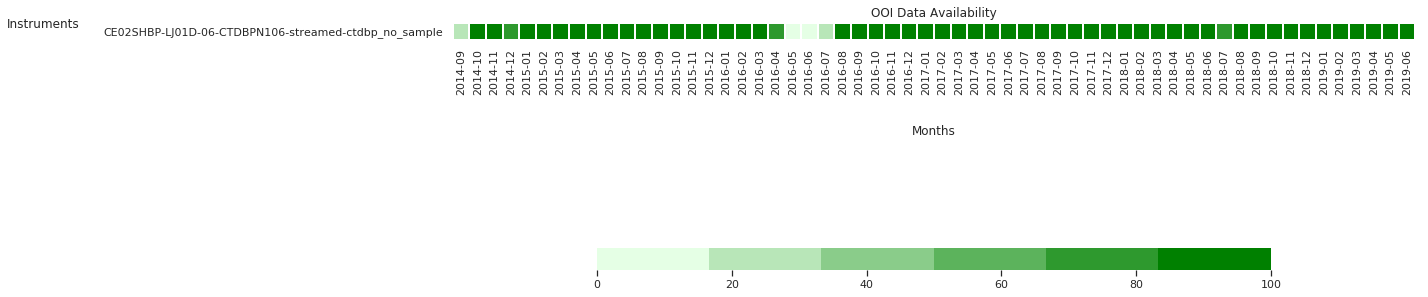

In [77]:
ooi.search(region='Coastal Endurance', site='Oregon Shelf Cabled Benthic Experiment Package',instrument='CTD').data_availability()

One note is that I could also do the same thing for multiple instruments, streams, etc. all at once.  For example, if I wanted both the pH and DO sensor data, my search would look like:
```python
ooi.search(region='Coastal Endurance', site='Oregon Shelf Cabled Benthic Experiment Package',instrument='Seawater pH, Dissolved Oxygen')
```

### Part 2: Requesting Data

Now that I've searched for the CTD, any other function I call from the `ooi` object is specific to the search I conducted.  I can now request data from the instrument I picked above using the `ooi.request_data()` function and specifying a begin and end date for the data that I want.  When I run the function, `yodapy` will interact with the M2M API and request data, which will be packaged into netCDF files and put in my THREDDS Data Server.  You can view what data you already have requested by going to: `https://opendap.oceanobservatories.org/thredds/catalog/ooi/*YOUR_OOI_ACCOUNT_EMAIL_ADDRESS*/catalog.html`

In one line, I can submit my data request, and have `yodapy` check when all of the netCDF files are available on the THREDDS server and pull it into python using xarray.  For this example I'm going to request one month of data from the CTD I searched for in Part 1.  `yodapy` will check every 10 seconds and give me an update if the data is avalable yet:

In [99]:
dslist = ooi.request_data(begin_date='2018-08-01', end_date='2018-09-01', time_check = False).to_xarray()

/srv/conda/envs/notebook/lib/python3.6/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 10s
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Data request time elapsed: 10s
Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 20s


Data request time elapsed: 20s


(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 30s
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Data request time elapsed: 30s
Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 40s
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Data request time elapsed: 40s
Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 50s
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Data request time elapsed: 50s
Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 60s
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Data request time elapsed: 60s
Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 70s
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Data request time elapsed: 70s
Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 81s
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Data request time elapsed: 81s
Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 91s
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Data request time elapsed: 91s
Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 101s
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Data request time elapsed: 101s
Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 111s
(MainThread) Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


Data request time elapsed: 111s
Your data (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) is still compiling... Please wait.


(MainThread) Data request time elapsed: 121s
(MainThread) Request (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) completed.
(MainThread) Acquiring data from opendap urls ...


Data request time elapsed: 121s
Request (https://opendap.oceanobservatories.org/async_results/leviner@uw.edu/20190610T191503-CE02SHBP-LJ01D-06-CTDBPN106-streamed-ctdbp_no_sample) completed.


When the data request is done, one thing that `yodapy` does is keeps track of the last request so you can check what data you asked for:

In [107]:
ooi.last_requests

[('https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHBP/LJ01D/06-CTDBPN106/streamed/ctdbp_no_sample',
  {'beginDT': '2018-08-01T00:00:00.000000Z',
   'endDT': '2018-09-01T00:00:00.000000Z',
   'format': 'application/netcdf',
   'limit': -1,
   'execDPA': 'true',
   'include_provenance': 'false'})]

### Part 3: Data Exploration

In my 1 line request above, I had `yodapy` read in the data from the netCDF files to an array of xarray datasets I called `dslist`.  If I had requested multiple instruments or my instrument had multiple data streams and I didn't specify which one I wanted in my search, then the length of `dslist` would be based on however many individual streams were included in the data request.  Since there was only one data stream available for the single CTD, I have one element in `dslist`, which I will assign to a new dataset variable and then see what it contains:

In [109]:
dsCTD = dslist[0]
dsCTD

<xarray.Dataset>
Dimensions:                                     (obs: 2227578)
Coordinates:
  * obs                                         (obs) int32 0 1 ... 2227577
    time                                        (obs) datetime64[ns] dask.array<shape=(2227578,), chunksize=(2227578,)>
    pressure                                    (obs) float64 dask.array<shape=(2227578,), chunksize=(2227578,)>
    lat                                         (obs) float64 dask.array<shape=(2227578,), chunksize=(2227578,)>
    lon                                         (obs) float64 dask.array<shape=(2227578,), chunksize=(2227578,)>
Data variables:
    deployment                                  (obs) int32 dask.array<shape=(2227578,), chunksize=(2227578,)>
    id                                          (obs) |S64 dask.array<shape=(2227578,), chunksize=(2227578,)>
    conductivity                                (obs) float64 dask.array<shape=(2227578,), chunksize=(2227578,)>
    driver_timestamp  

[xarray](http://xarray.pydata.org/en/stable/), which has kept our netCDF file variables nicely organized, has some handy tools borrowed from [pandas](https://pandas.pydata.org/) such as the ability to quickly plot any of the data variables:

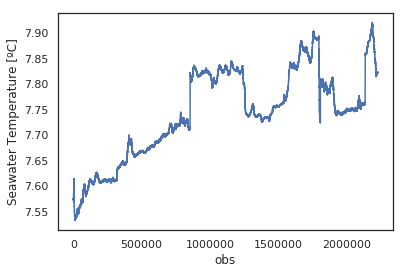

In [112]:
dsCTD.seawater_temperature.plot()

However, you might notice that the x-axis is just `obs`, a count of observations in the whole dataset.  This isn't as intuitive as plotting against something like time, which if we look above, is one of the coordinates available in the dataset.  I can tell xarray to switch to use time as my dimension rather than obs and then quickly replot.

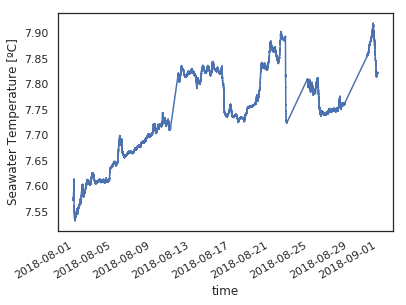

In [115]:
dsCTD = dsCTD.swap_dims({'obs':'time'})
dsCTD.seawater_temperature.plot()

### \*If working local...

Now that you have data requested and `yodapy` had organized all of the data into a nice dataset for you, you can save a copy of the entire dataset as a netCDF to your local computer, which you can then play around with in whatever language/software you prefer.  xarray can read and write netCDF files, and the simplest way to save your new data would be:

```python
dsCTD.to_netdf('PATH/FILENAME')
```